In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

from warnings import filterwarnings 

In [144]:
# load dataset
df = pd.read_csv("ENB2012_data.csv")

# Assign names to Columns
df.columns = ["Relative_compactness", "Surface_area","Wall_area","Roof_area","Overall_height","Orientation",
              "Glazing_area","Glazing_area_distribution","Heating_load","Cooling_load"]

In [145]:
df.head()

,Relative_compactness,Surface_area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_area_distribution,Heating_load,Cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_area_distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [147]:
# check missingvalue
df.isnull().sum()

Relative_compactness         0
Surface_area                 0
Wall_area                    0
Roof_area                    0
Overall_height               0
Orientation                  0
Glazing_area                 0
Glazing_area_distribution    0
Heating_load                 0
Cooling_load                 0
dtype: int64

In [148]:
print("Shape : ",df.shape)

Shape :  (768, 10)


In [149]:
df_Heating_load = df["Heating_load"]
df_Cooling_load = df["Cooling_load"]

<AxesSubplot:xlabel='Heating_load'>

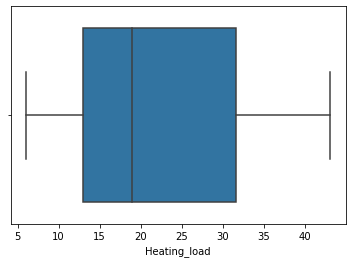

In [150]:
# check the contrary observation
sns.boxplot(x = df_Heating_load)

<AxesSubplot:xlabel='Cooling_load'>

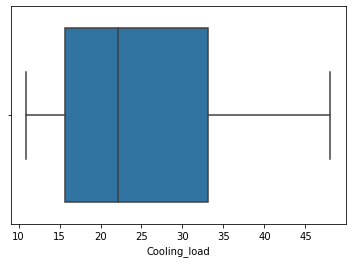

In [151]:
sns.boxplot(x = df_Cooling_load)

We do not have any contradictory observations.<br>
This gives us convenience.

- We have two dependent variables.
- First is **"Heating_load".**
- Second is **"Cooling_load".**

In [152]:
Y = df.iloc[:,8:]
X = df.iloc[:,:8]

### KNN

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 99)

In [154]:
knn_model = KNeighborsRegressor().fit(X_train, Y_train)

In [155]:
print("n_neighbors:",knn_model.n_neighbors)
print("knn_model:",knn_model.metric)

n_neighbors: 5
knn_model: minkowski


In [156]:
y_pred = knn_model.predict(X_test)

In [157]:
np.sqrt(mean_squared_error(Y_test, y_pred))

2.394342156460669

#### Tuning

In [158]:
RMSE = []

for neighbors in range (20):
    neighbors = neighbors + 1
    knn_model = KNeighborsRegressor(n_neighbors = neighbors).fit(X_train, Y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
    RMSE.append(rmse)
    print("neigbors: ",neighbors, "for RMSE values: ",rmse )

neigbors:  1 for RMSE values:  2.979339222835227
neigbors:  2 for RMSE values:  2.694586664649532
neigbors:  3 for RMSE values:  2.242279663281089
neigbors:  4 for RMSE values:  2.2827833213910727
neigbors:  5 for RMSE values:  2.394342156460669
neigbors:  6 for RMSE values:  2.567670670412638
neigbors:  7 for RMSE values:  2.719265987808807
neigbors:  8 for RMSE values:  2.701166129476399
neigbors:  9 for RMSE values:  2.7072955339411324
neigbors:  10 for RMSE values:  2.7429237848988404
neigbors:  11 for RMSE values:  2.7413728371998682
neigbors:  12 for RMSE values:  2.7488334537614203
neigbors:  13 for RMSE values:  2.7699120719130454
neigbors:  14 for RMSE values:  2.7868995401850056
neigbors:  15 for RMSE values:  2.8299727052899137
neigbors:  16 for RMSE values:  2.86301339327166
neigbors:  17 for RMSE values:  2.8896456890536513
neigbors:  18 for RMSE values:  2.9042518080517374
neigbors:  19 for RMSE values:  2.8991345162197906
neigbors:  20 for RMSE values:  2.905458613527520

- Best n_neighbors = 3 

In [162]:
# Thanks The GridSearchCV, We can find best_params quickly.
knn_params = {"n_neighbors": np.arange(1,30,1)}
knn = KNeighborsRegressor()

In [163]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train,Y_train)

In [164]:
knn_cv_model.best_params_

{'n_neighbors': 3}

In [166]:
# Final model 
knn_final = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train,Y_train)

In [167]:
y_pred = knn_final.predict(X_test)

In [168]:
np.sqrt(mean_squared_error(Y_test,y_pred))

2.242279663281089

- We reduced our error from 2.39 to 2.24.So our final model is successful

### Support Vector Regression